In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor

In [3]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [4]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [5]:
chdir = True

In [6]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [7]:
from IPython.display import IFrame
IFrame("../assets/testbed.png", width=850, height=480)

In [8]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets/load_stimulus_global.csv')
#file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1780 entries, 0 to 177
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          1780 non-null   float64
 1   output_rate                         1780 non-null   float64
 2   latency                             1780 non-null   float64
 3   firewall_instructions               1780 non-null   float64
 4   nf_router_instructions              1780 non-null   float64
 5   ndpi_stats_instructions             1780 non-null   float64
 6   payload_scan_instructions           1780 non-null   float64
 7   bridge_instructions                 1780 non-null   float64
 8   firewall_branches                   1780 non-null   float64
 9   nf_router_branches                  1780 non-null   float64
 10  ndpi_stats_branches                 1780 non-null   float64
 11  payload_scan_branches               1780 non

In [9]:
corr = data.corr()
correlation_list = []
for i in range(1, 2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and ndpi_stats_LLC-loads: 0.98
Correlation between output_rate and ndpi_stats_L1-dcache-load-misses: 0.98
Correlation between output_rate and ndpi_stats_cache-references: 0.98
Correlation between output_rate and payload_scan_LLC-loads: 0.98
Correlation between output_rate and payload_scan_cache-references: 0.97
Correlation between output_rate and nf_router_LLC-loads: 0.97
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.97
Correlation between output_rate and firewall_LLC-stores: 0.97
Correlation between output_rate and nf_router_cache-references: 0.97
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.97
Correlation between output_rate and firewall_cache-references: 0.97
Correlation between output_rate and bridge_LLC-stores: 0.97
Correlation between output_rate and ndpi_stats_LLC-stores: 0.97
Correlation between output_rate and firewall_L1-dcache-load-misses: 0.97
Correlation between output_rate and firewall_L

In [10]:
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between latency and ndpi_stats_LLC-loads: 0.59
Correlation between latency and ndpi_stats_cache-references: 0.58
Correlation between latency and ndpi_stats_L1-dcache-load-misses: 0.57
Correlation between latency and payload_scan_LLC-loads: 0.57
Correlation between latency and firewall_LLC-loads: 0.56
Correlation between latency and firewall_cache-references: 0.56
Correlation between latency and firewall_L1-dcache-load-misses: 0.56
Correlation between latency and payload_scan_cache-references: 0.56
Correlation between latency and nf_router_LLC-loads: 0.56
Correlation between latency and payload_scan_L1-dcache-load-misses: 0.56
Correlation between latency and firewall_LLC-stores: 0.56
Correlation between latency and nf_router_L1-dcache-loads: 0.56
Correlation between latency and nf_router_instructions: 0.55
Correlation between latency and nf_router_branches: 0.55
Correlation between latency and nf_router_cache-references: 0.55
Correlation between latency and nf_router_L1-dcac

# Several ML algorithm to predict rate

In [11]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets/load_stimulus_global.csv')
#file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()

In [12]:
# training  

X = df.drop(['input_rate','output_rate', 'latency','firewall_cycles','payload_scan_cycles','ndpi_stats_branch-load-misses',
             'nf_router_cycles','bridge_cycles','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses'], axis=1)
#X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ML model
model = DecisionTreeRegressor(random_state=0)
#model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100, random_state=42)

# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

Accuracy within 5% threshold: 83.70786516853933
[0.0, 83.70786516853933, 88.57677902621724, 91.01123595505618, 94.3820224719101, 97.00374531835206, 97.00374531835206, 97.00374531835206, 97.00374531835206, 97.75280898876404, 100.0]


In [13]:
# predict dataset 'dag'/ 'resource_stimulus'

# Read the CSV file
path = '../Dag/dag-1/datasets/load_stimulus_global.csv'
#path = '../linear/datasets/resource_stimulus_global.csv'
#path = '../linear/datasets/random_rates_exp-1.csv'
df = pd.read_csv(path)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the features and target variable
X_test = df.drop(['Unnamed: 0','input_rate', 'output_rate', 'latency'], axis=1)
X_test =  df.drop(['Unnamed: 0','input_rate','output_rate', 'latency','firewall_cycles','payload_scan_cycles','ndpi_stats_branch-load-misses',
             'nf_router_cycles','bridge_cycles','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses'], axis=1)
y_test =df['input_rate'].values


# Standardize the features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Evaluate
y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
mse = mean_squared_error(y_test, y_pred)

# accuracy
threshold = 0.05
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print(f'accurancy with thoreshold 5%:{accuracy_within_threshold}')

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

accurancy with thoreshold 5%:10.698198198198199
[0.0, 11.26126126126126, 11.26126126126126, 11.26126126126126, 11.26126126126126, 11.26126126126126, 22.52252252252252, 33.78378378378378, 45.04504504504504, 90.65315315315316, 99.43693693693693]


C:\Users\Qiong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


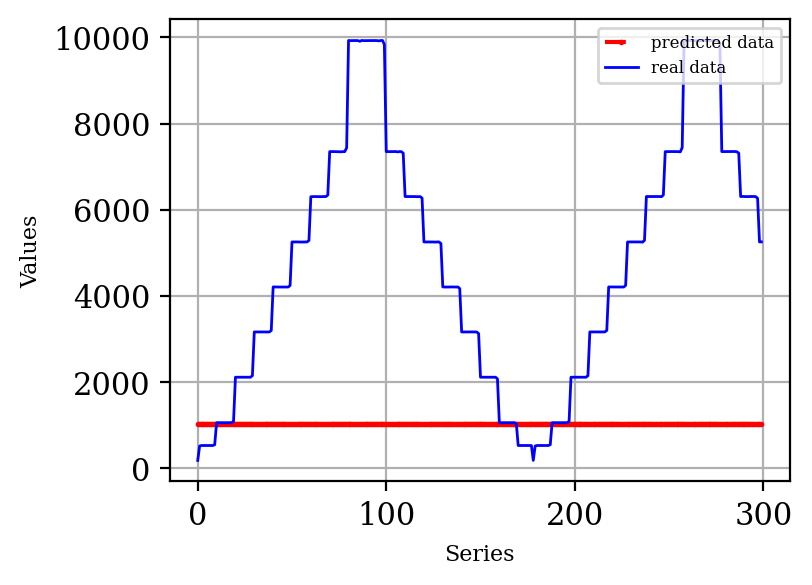

In [14]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(y_pred[:300], marker='o',c='r',markersize = 1, linestyle='-', dashes=(5, 3),label='predicted data')
plt.plot(y_test[:300].tolist(), c='b',linestyle='-',linewidth = 1,label='real data')

plt.xlabel('Series',fontsize=8)
plt.ylabel('Values',fontsize=8)

plt.legend(loc="upper right", fontsize=6)
plt.grid()

# DNN to predict rate (training set: global)

In [15]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets/load_stimulus_global.csv')
file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()

In [16]:
# data set
# load_stimulus_global.csv: exp1_exp10
# load_stimulus_global_1.csv:exp1_exp10+fixed_5000+fixed_7500
# load_stimulus_global_2.csv:exp1_exp10+fixed_5000+fixed_7500+random
# load_stimulus_global_3.csv:exp1_exp10+random
#load_stimulus_global_4.csv:exp1_exp10+stage_random
# performance: global>3>2>1

In [17]:
# training 
X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
X = df.drop(['input_rate','output_rate', 'latency','firewall_cycles','payload_scan_cycles','ndpi_stats_branch-load-misses',
             'nf_router_cycles','bridge_cycles','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses'], axis=1)

y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

21977


In [51]:
# model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))

# Add output layer
model.add(Dense(1))

In [52]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=8, epochs=100, verbose=1)

Epoch 1/100
1923/1923 [==============================] - 7s 3ms/step - loss: 3295482.2500
Epoch 2/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2411353.2500
Epoch 3/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2367180.2500
Epoch 4/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2344280.0000
Epoch 5/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2349448.0000
Epoch 6/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2317861.2500
Epoch 7/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2316794.2500
Epoch 8/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2305272.2500
Epoch 9/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2308694.2500
Epoch 10/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2305054.5000
Epoch 11/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2294549.0000
Epoch 12

1923/1923 [==============================] - 6s 3ms/step - loss: 2154016.0000
Epoch 92/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2153186.7500
Epoch 93/100
1923/1923 [==============================] - 7s 4ms/step - loss: 2150886.2500
Epoch 94/100
1923/1923 [==============================] - 7s 3ms/step - loss: 2148214.0000
Epoch 95/100
1923/1923 [==============================] - 7s 4ms/step - loss: 2146306.2500
Epoch 96/100
1923/1923 [==============================] - 7s 4ms/step - loss: 2149497.5000
Epoch 97/100
1923/1923 [==============================] - 7s 4ms/step - loss: 2149539.2500
Epoch 98/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2150920.5000
Epoch 99/100
1923/1923 [==============================] - 5s 3ms/step - loss: 2141451.7500
Epoch 100/100
1923/1923 [==============================] - 6s 3ms/step - loss: 2144530.7500


17/17 [==============================] - 0s 3ms/step
[0.0, 73.40823970037454, 82.77153558052434, 88.95131086142321, 94.9438202247191, 97.56554307116106, 97.94007490636703, 97.94007490636703, 97.94007490636703, 98.50187265917603, 98.68913857677903]


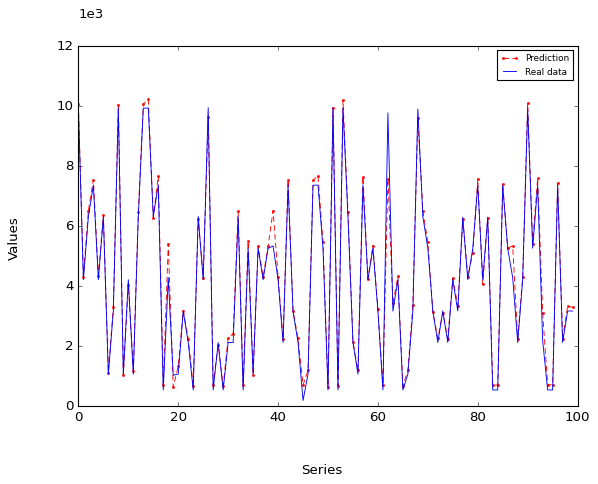

In [41]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:100], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:100], c='b',linestyle='-',linewidth = 0.8,label='Real data')


plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()


In [22]:

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9846158927604968


687/687 [==============================] - 2s 3ms/step
accurancy with thoreshold 5%:[19.74791828]
[array([0.]), array([38.14442372]), array([57.33266597]), array([66.05087137]), array([72.74423261]), array([78.03612868]), array([81.79915366]), array([84.63848569]), array([86.56322519]), array([87.88733676]), array([89.30700278])]


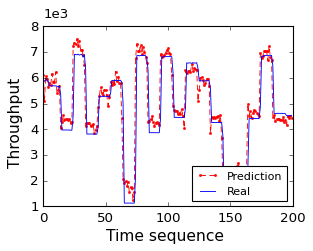

R-squared: 0.39939478125490113


In [54]:
# predict dataset 'dag-1'

# read the CSV file
path = ('../linear/datasets/random_rates_exp-1.csv')

df = pd.read_csv(path)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# separate the features and target variable
X_test = df.drop(['Unnamed: 0','input_rate', 'output_rate', 'latency'], axis=1)
X_test = df.drop(['Unnamed: 0','input_rate','output_rate', 'latency','firewall_cycles','payload_scan_cycles','ndpi_stats_branch-load-misses',
             'nf_router_cycles','bridge_cycles','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses'], axis=1)
y_test =df['output_rate'].values

# standardize the features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# evaluate
y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
mse = mean_squared_error(y_test, y_pred)

# accuracy
threshold = 0.05
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print(f'accurancy with thoreshold 5%:{accuracy_within_threshold}')

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[400:600], marker='o', c='r',markersize = 2,linewidth = 0.8,  markeredgecolor='red', linestyle='-', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[400:600], c='b',linestyle='-',linewidth = 0.8, label='Real')

plt.legend(loc="lower right", fontsize=10)
fig.text(0.5, 0.01, 'Time sequence', size='14', ha='center')
fig.text(0.01, 0.5, 'Throughput', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')


#save figure
folder_path = 'figure/rate_prediction'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'accuracy-random_rate_new.pdf' )
plt.savefig(file_path)

plt.show()

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

6/6 [==============================] - 0s 2ms/step
accurancy with thoreshold 5%:[59.5505618]
[array([0.]), array([70.78651685]), array([83.14606742]), array([87.64044944]), array([91.57303371]), array([97.75280899]), array([98.31460674]), array([98.31460674]), array([98.31460674]), array([98.87640449]), array([99.43820225])]


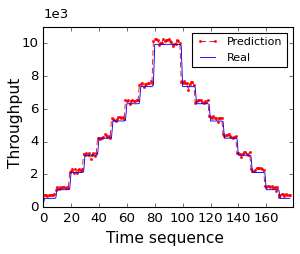

In [47]:
# predict dataset 'linear'
import matplotlib.ticker as mticker
# read the CSV file
path = '../linear/datasets/load_stimulus_exp7.csv'

df = pd.read_csv(path)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# separate the features and target variable
X_test = df.drop(['Unnamed: 0','input_rate', 'output_rate', 'latency'], axis=1)
X_test = df.drop(['Unnamed: 0','input_rate','output_rate', 'latency','firewall_cycles','payload_scan_cycles','ndpi_stats_branch-load-misses',
             'nf_router_cycles','bridge_cycles','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses'], axis=1)
y_test =df['input_rate'].values

# standardize the features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# evaluate
y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
mse = mean_squared_error(y_test, y_pred)
y_pred[177] = y_pred[176]
# accuracy
threshold = 0.05
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print(f'accurancy with thoreshold 5%:{accuracy_within_threshold}')

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred, marker='o', c='r',markersize = 2,linewidth = 0.8,  markeredgecolor='red', linestyle='-', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist(), c='b',linestyle='-',linewidth = 0.8, label='Real')

plt.legend(loc="upper right", fontsize=10)
fig.text(0.5, 0, 'Time sequence', size='14', ha='center')
fig.text(0.01, 0.5, 'Throughput', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set x-axis and y-axis limits
plt.xlim(0, 179)
plt.ylim(0, 11000)

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')


#save figure
folder_path = 'figure/rate_prediction'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'accuracy-linear-1.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.show()

In [45]:
print(y_pred[177])

[2603.3723]


7/7 [==============================] - 0s 2ms/step
accurancy with thoreshold 5%:[38.46153846]
[array([0.]), array([58.17307692]), array([72.59615385]), array([81.25]), array([87.01923077]), array([87.5]), array([96.63461538]), array([97.59615385]), array([98.07692308]), array([98.55769231]), array([99.51923077])]


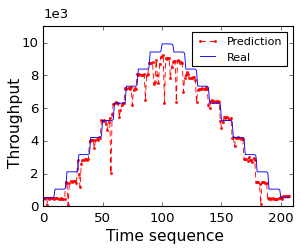

In [27]:
# predict dataset 'dag-2'

# read the CSV file
path = '../Dag/dag-2/datasets/load_stimulus_exp8.csv'

df = pd.read_csv(path)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# separate the features and target variable
X_test = df.drop(['Unnamed: 0','input_rate', 'output_rate', 'latency'], axis=1)
X_test = df.drop(['Unnamed: 0','input_rate','output_rate', 'latency','flow_tracker_cycles','payload_scan_cycles','ndpi_stats_branch-load-misses',
             'nf_router_cycles','bridge_cycles','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','flow_tracker_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','flow_tracker_branch-misses'], axis=1)
y_test =df['input_rate'].values

# standardize the features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# evaluate
y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
mse = mean_squared_error(y_test, y_pred)

# accuracy
threshold = 0.05
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print(f'accurancy with thoreshold 5%:{accuracy_within_threshold}')

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred, marker='o',c='r',markersize = 2,linewidth = 0.8, markeredgecolor='red',  linestyle='-', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist(), c='b',linestyle='-',linewidth = 0.8, label='Real')

plt.legend(loc="upper right", fontsize=10)
fig.text(0.5, 0.01, 'Time sequence', size='14', ha='center')
fig.text(0.01, 0.5, 'Throughput', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set x-axis and y-axis limits
plt.xlim(0, 210)
plt.ylim(0, 11000)


# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')



#save figure
folder_path = 'figure/rate_prediction'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'accuracy-dag-2.pdf' )
plt.savefig(file_path, bbox_inches='tight')

plt.show()